In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\shopping_behavior_updated.csv')
df.head(6)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly


In [3]:
# for col in df.columns:
#     print(df[col].value_counts())

# 1. Future Target Audience – Age Focus

In [7]:
#to which age of audience we should focus on to run future marketing campaigns/target audience is different than 44years?
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(df['Age'], 44)
print(f"T stat : {tstat}")
print(f"P value : {pval}")

if pval < 0.05:
    print("The average age of current buyers is significantly different from 44.")
    print("Consider targeting a different age group for future marketing campaigns.")
else:
    print("The average age of current buyers is close to 44.")
    print("Targeting the 41–45 age group may be effective for future campaigns.")

T stat : 0.28113737626956525
P value : 0.7786199524139885
The average age of current buyers is close to 44.
Targeting the 41–45 age group may be effective for future campaigns.


# Category Prioritization for Promotions

Chi-Square Statistic: 77.44123931623932
P-value: 1.0858704471091138e-16
Clothing category is highly purchased than others
Actual proportion of purchase based on category is :  [44.53846154 31.79487179 15.35897436  8.30769231]


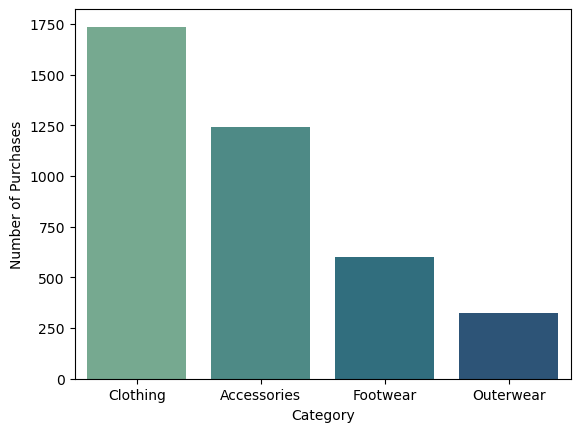

In [8]:
#Are customers more interested in Clothing, or is that just due to inventory volume?
from scipy.stats import chisquare
f_ob = df['Category'].value_counts().values
total = len(df)
expected = [0.40, 0.30, 0.20, 0.10]
f_exp = [total * i for i in expected]
chi_stat, pval = chisquare(f_ob,  f_exp)
print("Chi-Square Statistic:", chi_stat)
print("P-value:", pval)

if pval < 0.05:
    print("Clothing category is highly purchased than others")
else:
    print("Purchasing of clothing is same or less than any other categories")
    
proportions = f_ob/total * 100
print("Actual proportion of purchase based on category is : ", proportions)

dist = df['Category'].value_counts()
sns.barplot(x=dist.index, y=dist.values, palette='crest')
plt.ylabel("Number of Purchases")
plt.show()

# 3. Gender-based Campaign Strategy

chi_stat:  3.928008815312865
P value:  0.6864183021067272
Gender and frequency of purchases are independent.


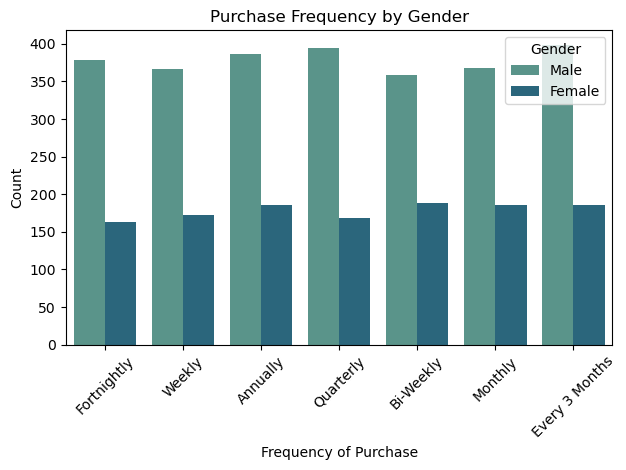

In [9]:
#Is Gender strongly associated with Purchase Frequency?
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df['Gender'], df['Frequency of Purchases'])

chi_stat, pval, dof, expected = chi2_contingency(crosstab)

print("chi_stat: ", chi_stat)
print("P value: ", pval)

if pval < 0.05:
    print("Gender and frequency of purchases are dependent.")
else:
    print("Gender and frequency of purchases are independent.")

    
sns.countplot(data=df, x='Frequency of Purchases', hue='Gender', palette='crest')
plt.title('Purchase Frequency by Gender')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Even though the raw counts might suggest some differences (e.g., more males purchase weekly), those differences **are not statistically significant** enough to say **gender influences frequency**.

So:
- Campaign strategies **shouldn’t be based solely on gender**.

# 4. Seasonal Strategy Using Category or Color

chi_stat:  7.933669035553151
P value:  0.5408444018435854
There is no significant difference in the purchase behavior across seasons for categories.


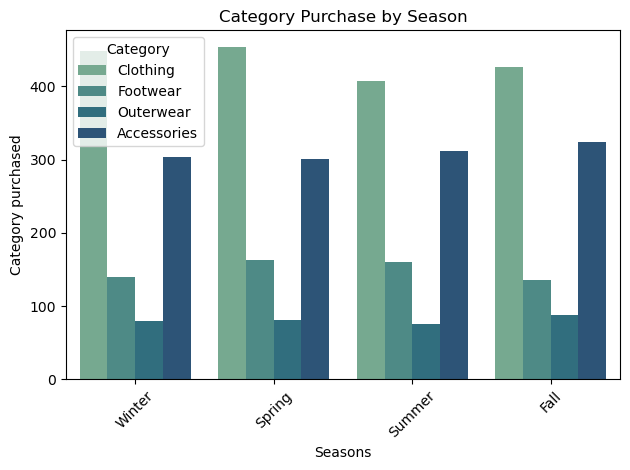

In [10]:
#Do certain categories get purchased more in specific seasons?
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df['Season'], df['Category'])

chi_stat, pval, dof, expected = chi2_contingency(crosstab)

print("chi_stat: ", chi_stat)
print("P value: ", pval)

if pval < 0.05:
    print("There is a significant difference in the purchase behavior across seasons for categories.")
else:
    print("There is no significant difference in the purchase behavior across seasons for categories.")

    
sns.countplot(data=df, x='Season', hue='Category', palette='crest')
plt.title('Category Purchase by Season')
plt.xlabel('Seasons')
plt.ylabel('Category purchased')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Since p-value > 0.05, we fail to reject the null hypothesis, which implies that the season doesn't have a significant impact on the categories being purchased.**

chi_stat:  64.6506366841786
P value:  0.718551112120402
There is no significant difference in the purchase behavior across seasons for colors.


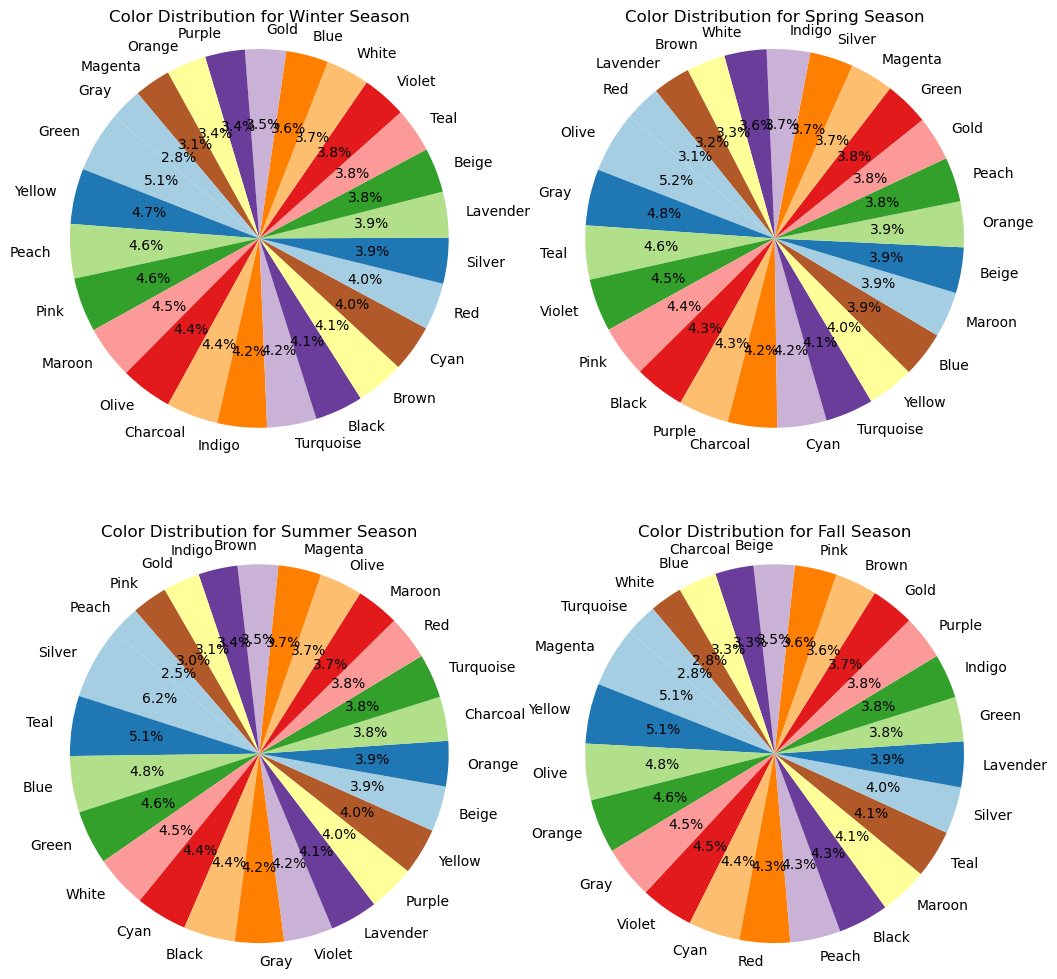

In [12]:
#"Do certain colors get purchased more in specific seasons?"
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df['Season'], df['Color'])

chi_stat, pval, dof, expected = chi2_contingency(crosstab)

print("chi_stat: ", chi_stat)
print("P value: ", pval)

if pval < 0.05:
    print("There is a significant difference in the purchase behavior across seasons for colors.")
else:
    print("There is no significant difference in the purchase behavior across seasons for colors.")

    
fig, axes = plt.subplots(2, 2, figsize=(11,11))
fig.tight_layout(pad=5.0) 

seasons = df['Season'].unique()

for i, season in enumerate(seasons):
    ax = axes[i//2, i%2] 

    season_data = df[df['Season'] == season]['Color'].value_counts()
    ax.pie(season_data, labels=season_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors[:len(season_data)])
    ax.set_title(f"Color Distribution for {season} Season")
    ax.axis('equal') 

plt.show()

**Since p-value > 0.05, we fail to reject the null hypothesis, which implies that the season doesn't have a significant impact on the colors being purchased.**

# 5. Two-way ANOVA: Tailored Offers

In [17]:
df.rename(columns={'Purchase Amount (USD)':"Purchase_amount"}, inplace=True)

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
models = ols('Purchase_amount ~ C(Season) + C(Location) + C(Season):C(Location)', data=df).fit()
anova_table = sm.stats.anova_lm(models, typ=2)
print(anova_table)

                             sum_sq      df         F    PR(>F)
C(Season)              7.196130e+03     3.0  4.315824  0.004798
C(Location)            3.575714e+04    49.0  1.312963  0.071455
C(Season):C(Location)  8.884338e+04   147.0  1.087411  0.226609
Residual               2.056439e+06  3700.0       NaN       NaN


### Key Results:
- **C(Season)**: The **p-value = 0.004798**, which is less than 0.05, indicating a significant effect of the **Season** on **Purchase Amount**. This means the purchase amount is statistically different across the different seasons.
  
- **C(Location)**: The **p-value = 0.071455**, which is greater than 0.05. This indicates that **Location** does not have a statistically significant effect on **Purchase Amount** at the 5% significance level.
  
- **C(Season):C(Location)**: The **p-value = 0.226609**, which is also greater than 0.05, indicating that the interaction between **Season** and **Location** does not significantly affect **Purchase Amount**.

### Conclusions:
- **Season** has a significant effect on **Purchase Amount** (p < 0.05), so we may want to consider seasonality when planning marketing strategies or sales activities.
- **Location** and its interaction with **Season** do not appear to have a significant effect on **Purchase Amount** in this case.


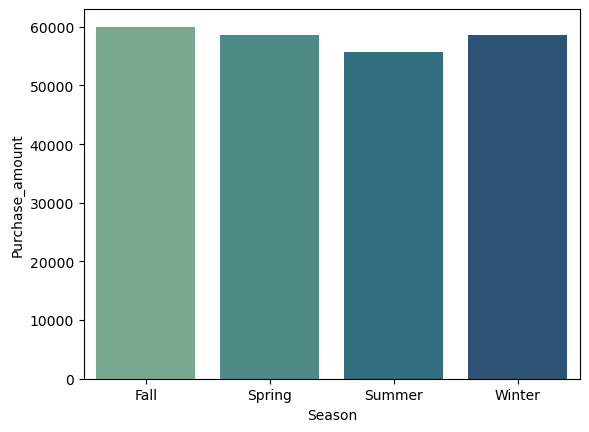

In [24]:
group = df.groupby("Season")['Purchase_amount'].sum().reset_index()
sns.barplot(x=group['Season'], y=group['Purchase_amount'], palette='crest')
plt.show()

# 6. Loyalty Programs

Z stat : -0.4368012420060051
P value : 0.6622554981999602
Customers with subscription spend equal or less amount in shopping than not subscription customers


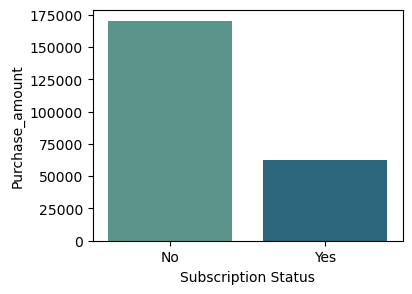

In [30]:
# Do subscribers spend more? Use this to drive loyalty programs.
from statsmodels.stats.weightstats import ztest
subs = df[df['Subscription Status'] == "Yes"]["Purchase_amount"]
nsubs = df[df['Subscription Status'] == "No"]["Purchase_amount"]

zstat, pval = ztest(x1 = subs, x2 = nsubs, value= 0)
print(f"Z stat : {zstat}")
print(f"P value : {pval}")

if pval < 0.05:
    print("Subscribers spend more than non subscribers")
else:
    print("Customers with subscription spend equal or less amount in shopping than not subscription customers")
    
group = df.groupby('Subscription Status')['Purchase_amount'].sum().reset_index()
plt.figure(figsize=(4,3))
sns.barplot(x=group['Subscription Status'], y=group['Purchase_amount'], palette='crest')
plt.show()

# 7. Gender-wise response to discounts.

Z stat : -37.20914032652474
P value : 1.0
The proportion of females using promo codes is less than or equal to that of males customers


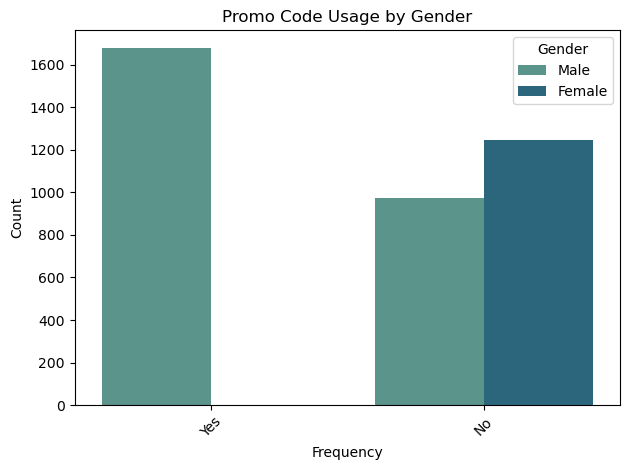

In [35]:
#Are promo codes used more by female customers than male?
from statsmodels.stats.proportion import proportions_ztest
female = len(df[(df['Gender'] == "Female") & (df['Promo Code Used'] == "Yes")])
male = len(df[(df['Gender'] == "Male") & (df['Promo Code Used'] == "Yes")])

female_count = (df['Gender'] == "Female").sum()
male_count = (df['Gender'] == "Male").sum()
zstat, pval = proportions_ztest([female, male], [female_count, male_count], value=0, alternative='larger')

print(f"Z stat : {zstat}")
print(f"P value : {pval}")

if pval < 0.05:
    print("The proportion of females using promo codes is greater than males")
else:
    print("The proportion of females using promo codes is less than or equal to that of males customers")
    
    
sns.countplot(data=df, x='Promo Code Used', hue='Gender', palette='crest')
plt.title('Promo Code Usage by Gender')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Expensive Shipping reasons

In [39]:
# Is expensive shipping linked to higher purchases?
from scipy.stats import levene
groups = [df[df['Shipping Type'] == st]['Purchase_amount'] for st in df['Shipping Type'].unique()]
stat, pval = levene(*groups)

print("Levene Statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("Variances are significantly different — assumption violated.")
else:
    print("Variances are equal — assumption met.")

print('----------------------------------------------------------------')

from scipy.stats import f_oneway
f_stat, pval = f_oneway(*groups)
print("F Statistic:", f_stat)
print("P-value:", pval)

if pval < 0.05:
    print("Reject the null hypothesis – shipping type affects purchase amount.")
else:
    print("Fail to reject the null hypothesis – shipping type does not significantly affect purchase amount.")

Levene Statistic: 0.6802755773255592
P-value: 0.6383867726806871
Variances are equal — assumption met.
----------------------------------------------------------------
F Statistic: 1.1240701227396235
P-value: 0.34513092734637013
Fail to reject the null hypothesis – shipping type does not significantly affect purchase amount.


# 💡 Business Summary

### 📊 **Insights & Recommendations Based on Customer Purchase Behavior Analysis**

Based on the results from statistical tests and purchasing patterns, we recommend the following strategies:

1️⃣ **Target Age Group:**  
Focus marketing efforts on customers aged **41–50**, as they show a strong representation in purchases. Statistical evidence (T-test) suggests this age bracket is central to customer behavior.

2️⃣ **Seasonal Product Focus:**  
Goodness of Fit a Chi square test suggest **Clothing and Accessories** consistently perform well **across all seasons**. Campaigns and stock planning should prioritize these categories year-round.

3️⃣ **Gender-Neutral Campaigns:**  
Since **gender and purchase frequency are independent** (Chi-Square test of independence), marketing campaigns (emails, SMS, etc.) should avoid gender bias and instead focus on personalized content based on frequency of purchases or interest.

4️⃣ **Rethink Loyalty Subscriptions:**  
Subscription-based customers show **lower purchasing behavior** compared to non-subscribers. The loyalty program should be **re-evaluated, simplified, or restructured** to drive better engagement.

5️⃣ **Discount Strategy by Gender:**  
**Male customers** are more likely to use promo codes and respond better to discounts. We suggest:
- Increasing discount visibility and value for **male customers**.
- Exploring **behavioral nudges** or adjusted discount triggers for **female customers** to encourage engagement with promotional offers.